In [1]:
import pandas as pd

# Read the TSV file into a DataFrame
df = pd.read_csv('meal_tracker.tsv', sep='\t')

# Print the column names and their data types
print(df.info())
                  

FileNotFoundError: [Errno 2] No such file or directory: 'meal_tracker.tsv'

In [ ]:
# step 0 data exploration and cleaning

In [2]:
df.head()

,ï»¿Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
df.shape

(42656, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿Review_ID       42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [5]:
df['Rating'].value_counts()

Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64

In [6]:
df.drop_duplicates(keep='first', inplace=True)
df

,ï»¿Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [7]:
# step 0.2 add sentiment column
def sentiment(score):
    if score > 3:
        return 1
    else:
        return 0
df['Sentiment'] = df['Rating'].apply(sentiment)

In [7]:
# step 0.3 remove stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# Assuming df is your DataFrame and 'Review_Text' is your column

# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\megta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Create a list of stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    text = text.lower()
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to your DataFrame
df['Review_Text_No_Stopwords'] = df['Review_Text'].apply(remove_stopwords)
df

,ï»¿Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Review_Text_No_Stopwords
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,'ve ever disneyland anywhere 'll find disneyla...
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"since last time visit hk disneyland .. yet , t..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,thanks god hot humid visiting park otherwise w...
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,hk disneyland great compact park . unfortunate...
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"location city , took around 1 hour kowlon , ki..."
...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,went disneyland paris july 03 thought brillian...
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,2 adults 1 child 11 visited disneyland paris b...
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,eleven year old daughter went visit son london...
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,1,"hotel , part disneyland paris complex , wonder..."


In [8]:
# Step 0 split into training and test set
training_set = df.iloc[:int(len(df) * TRAIN_SIZE_P)]
training_set

,ï»¿Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1
...,...,...,...,...,...,...,...
25592,143628886,5,2012-10,United States,Disneyland is truly the Happiest place on eart...,Disneyland_California,1
25593,143622277,5,2012-9,United States,I have been going to Disneyland the last week ...,Disneyland_California,1
25594,143618949,5,2012-10,United States,We are annual pass holders and love everything...,Disneyland_California,1
25595,143576957,3,2012-9,New Zealand,Not as many rides as I expected to it to have ...,Disneyland_California,0


In [9]:
# test set is last 20%
test_set = df.iloc[int(len(df) * 0.8):]
test_set

,ï»¿Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment
34126,367396496,3,2016-4,Luxembourg,My best Friend and I are huge Disney Fans sinc...,Disneyland_Paris,0
34127,367388148,1,2016-4,United Kingdom,I stayed at Disneyland Paris from 5 4 2016 9...,Disneyland_Paris,0
34128,367371478,3,2016-3,United States,This is a hard review to write. Being the Disn...,Disneyland_Paris,0
34129,367304021,3,2016-4,United Kingdom,We have just returned from Disneyland Paris wi...,Disneyland_Paris,0
34130,367255494,5,2016-4,United Kingdom,was sceptical about my enjoyment of disney wen...,Disneyland_Paris,1
...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,1


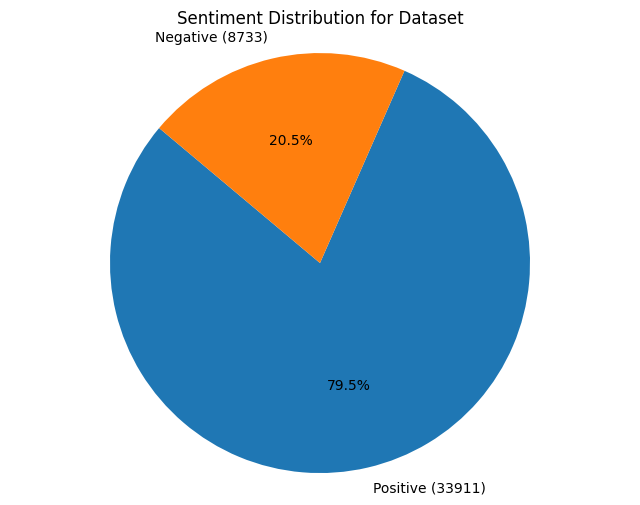

1: 33911 samples (79.5%)
0: 8733 samples (20.5%)


In [16]:
# get pie chart for break down
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the counts and percentages of each sentiment
sentiment_counts = df['Sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / len(df)) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=[f"{label} ({count})" for label, count in zip(sentiment_counts.index.map({1: 'Positive', 0: 'Negative'}), sentiment_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print number of samples and percentage for each sentiment
for sentiment, count, percentage in zip(sentiment_counts.index, sentiment_counts, sentiment_percentages):
    print(f"{sentiment}: {count} samples ({percentage:.1f}%)")

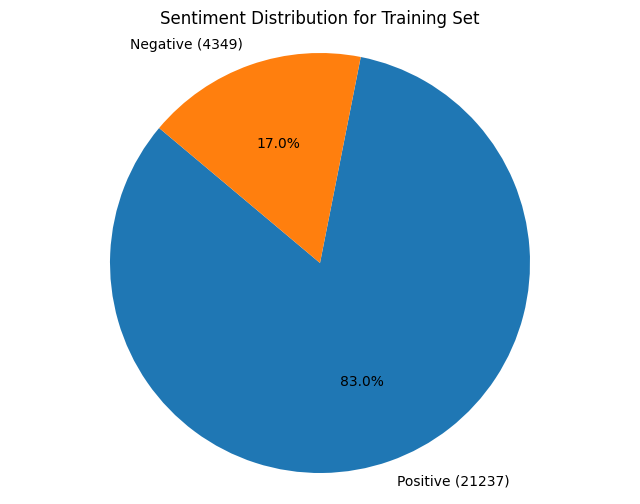

In [17]:
# get pie chart for break down
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the counts and percentages of each sentiment
sentiment_counts = training_set['Sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / len(training_set)) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=[f"{label} ({count})" for label, count in zip(sentiment_counts.index.map({1: 'Positive', 0: 'Negative'}), sentiment_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

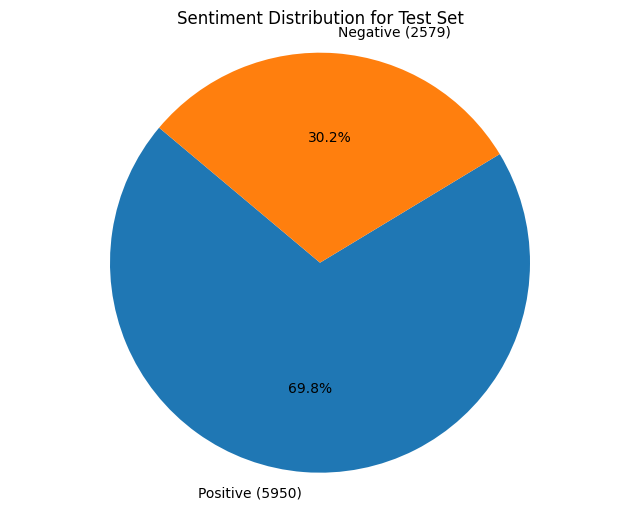

In [19]:
# Calculate the counts and percentages of each sentiment
sentiment_counts = test_set['Sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / len(test_set)) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=[f"{label} ({count})" for label, count in zip(sentiment_counts.index.map({1: 'Positive', 0: 'Negative'}), sentiment_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Test Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [11]:
# step 1 get vocabulary in training set
vocabulary = df['Review_Text_No_Stopwords'].str.split(expand=True).stack().unique().tolist()
vocabulary = [word.lower() for word in vocabulary]
# Print the vocabulary
vocabulary

["'ve",
 'ever',
 'disneyland',
 'anywhere',
 "'ll",
 'find',
 'hong',
 'kong',
 'similar',
 'layout',
 'walk',
 'main',
 'street',
 '!',
 'familiar',
 'feel',
 '.',
 'one',
 'rides',
 'small',
 'world',
 'absolutely',
 'fabulous',
 'worth',
 'day',
 'visited',
 'fairly',
 'hot',
 'relatively',
 'busy',
 'queues',
 'moved',
 'well',
 'since',
 'last',
 'time',
 'visit',
 'hk',
 '..',
 'yet',
 ',',
 'stay',
 'tomorrowland',
 'aka',
 'marvel',
 'land',
 'iron',
 'man',
 'experience',
 'n',
 'newly',
 'open',
 'ant',
 'wasp',
 'ironman',
 'great',
 'feature',
 'exciting',
 'especially',
 'whole',
 'scenery',
 '(',
 'central',
 'area',
 'kowloon',
 ')',
 'antman',
 'changed',
 'previous',
 'buzz',
 'lightyear',
 'less',
 "'m",
 'expecting',
 'something',
 'however',
 'boys',
 'like',
 'space',
 'mountain',
 'turns',
 'star',
 'wars',
 '1',
 'cast',
 'members',
 'staffs',
 'felt',
 'bit',
 'minus',
 'point',
 'dun',
 'disney',
 'brand',
 'seems',
 'local',
 'ocean',
 'park',
 'even',
 'wors

In [25]:
# step 2 get bag of words
from scipy.sparse import lil_matrix

# Assuming 'vocabulary' is a list of unique words
vocabulary_index = {word: i for i, word in enumerate(vocabulary)}

# Create a function to create a binary bag of words using a sparse matrix
def create_sparse_binary_bag_of_words(text, vocabulary_index):
    # Initialize a sparse matrix with dimensions (1, len(vocabulary))
    bag_of_words_sparse = lil_matrix((1, len(vocabulary_index)))
    words = word_tokenize(text)
    for word in words:
        if word in vocabulary_index:
            bag_of_words_sparse[0, vocabulary_index[word]] = 1
    return bag_of_words_sparse

# Apply the function to each review in your training set
# This will create a list of sparse matrices (one for each review)
sparse_bows = training_set['Review_Text_No_Stopwords'].apply(lambda x: create_sparse_binary_bag_of_words(x, vocabulary_index))

# Now, you can combine these into a single sparse matrix
from scipy.sparse import vstack
X_train = vstack(sparse_bows)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
# WE DON"T NEED THIS?
# Assuming training_set is your DataFrame and 'Review_Text_No_Stopwords' contains the preprocessed text

# Initialize CountVectorizer with binary=True to get a binary Bag of Words model
vectorizer = CountVectorizer(binary=True, vocabulary=vocabulary)

# Fit and transform the preprocessed texts
X_train = vectorizer.fit_transform(training_set['Review_Text_No_Stopwords'])
X_train

<25586x39941 sparse matrix of type '<class 'numpy.int64'>'
	with 1187516 stored elements in Compressed Sparse Row format>

In [17]:
y_train = training_set['Sentiment']
y_train

0        1
1        1
2        1
3        1
4        1
        ..
25592    1
25593    1
25594    1
25595    0
25596    1
Name: Sentiment, Length: 25586, dtype: int64

In [14]:
y_train_array = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else y_train
y_train_array

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [22]:
# step 3 construct model
## P(positive)
## p(negative)
num_rows = len(training_set)
num_rows_positive = (training_set['Sentiment'] == 1).sum()
num_rows_negative = (training_set['Sentiment'] == 0).sum()
probability_positive = num_rows_positive/num_rows
probability_negative = num_rows_negative/num_rows
probability_positive, probability_negative

(0.830024232001876, 0.16997576799812397)

In [ ]:
# for each word and label get probability =  ((count x = X and y = Y)+1) / (count(number of words when y = Y) + # of words in Vocabulary)


In [26]:
training_set['Word_Count'] = training_set['Review_Text_No_Stopwords'].apply(lambda x: len(word_tokenize(x)))
word_count_by_y = df.groupby('Sentiment')['Word_Count'].sum()
word_count_by_y

Sentiment
0     908769
1    2538198
Name: Word_Count, dtype: int64

In [28]:
# Convert to COO format for easier iteration over non-zero elements
import numpy as np
X_train_coo = X_train.tocoo()
feature_counts_positive = np.zeros(X_train.shape[1])
feature_counts_negative = np.zeros(X_train.shape[1])

for i, j, v in zip(X_train_coo.row, X_train_coo.col, X_train_coo.data):
    if y_train_array[i] == 0:
        feature_counts_negative[j] += v
    else:
        feature_counts_positive[j] += v

# Calculate likelihoods with Laplace smoothing --  this is numpy array
feature_counts_negative = feature_counts_negative + 1
feature_counts_positive = feature_counts_positive + 1
likelihoods_negative = (feature_counts_negative) / (word_count_by_y[0] +  len(vocabulary_index))
likelihoods_positive = (feature_counts_positive) / (word_count_by_y[1] +  len(vocabulary_index))
# each number is probability(x = word<corresponding to index of col in X_train> | y = positive/negative)
likelihoods_positive,likelihoods_negative

(array([4.55367224e-04, 3.80507025e-04, 4.13437755e-03, ...,
        7.75753363e-07, 7.75753363e-07, 7.75753363e-07]),
 array([3.85787016e-04, 2.79326665e-04, 2.34528992e-03, ...,
        1.05406289e-06, 1.05406289e-06, 1.05406289e-06]))

In [29]:
# prediction
def predict(X_new, probability_negative, probability_positive, likelihoods_negative, likelihoods_positive):
    # Ensure X_new is in COO format
    X_new_coo = X_new.tocoo()
    predictions = np.zeros(X_new.shape[0])
    
    # Log probabilities for numerical stability
    log_probability_negative = np.log(probability_negative)
    log_probability_positive = np.log(probability_positive)
    log_likelihoods_negative = np.log(likelihoods_negative)
    log_likelihoods_positive = np.log(likelihoods_positive)

    # Calculate log posterior probabilities
    for i in range(X_new.shape[0]):
        log_posterior_prob_0 = log_probability_negative
        log_posterior_prob_1 = log_probability_positive
        
        for j in range(X_new_coo.nnz):
            if X_new_coo.row[j] == i:
                feature_index = X_new_coo.col[j]
                log_posterior_prob_0 += log_likelihoods_negative[feature_index]
                log_posterior_prob_1 += log_likelihoods_positive[feature_index]
                
        # Classification based on higher log posterior probability
        predictions[i] = 1 if log_posterior_prob_1 > log_posterior_prob_0 else 0
        
    return predictions

In [30]:
X_test = vectorizer.fit_transform(test_set['Review_Text_No_Stopwords'])
y_pred_manual = predict(X_test, probability_negative, probability_positive, likelihoods_negative, likelihoods_positive)
y_pred_manual

array([1., 1., 1., ..., 1., 1., 1.])

In [31]:
# Calculate and print the accuracy
from sklearn.metrics import accuracy_score
y_test = test_set['Sentiment']
accuracy = accuracy_score(y_test, y_pred_manual)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7071168952983937


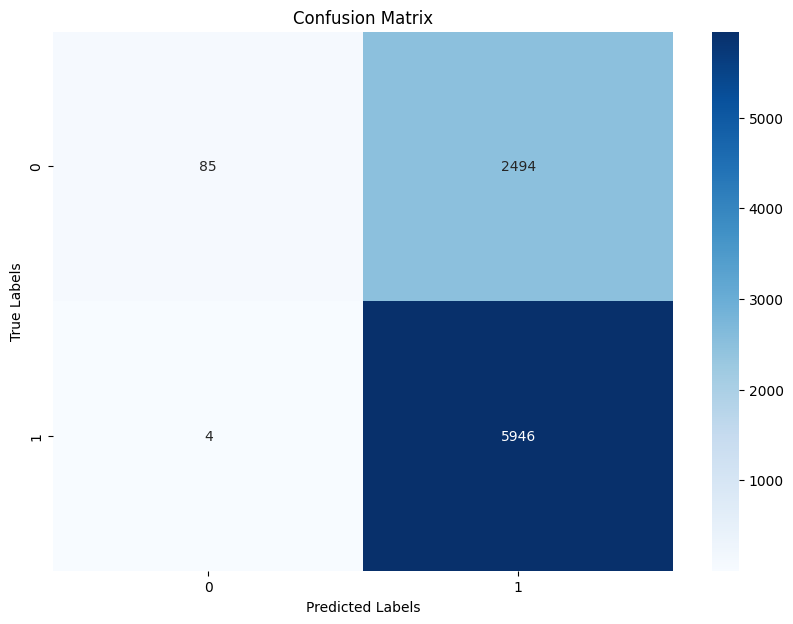

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_manual)
# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title for clarity
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [39]:
def print_metrics(cm):
    # Unpack confusion matrix elements
    TP, FP = cm[0]
    FN, TN = cm[1]
    
    # Calculate metrics
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    npv = TN / (TN + FN)
    accuracy = (TP + TN) / (TP + FP + FN + TN)
    recall = sensitivity  # Recall is the same as sensitivity
    f_score = 2 * (precision * recall) / (precision + recall)
    
    print(f'''Tan, Megan, A20527707 solution:
Training set size: 80 %  

Training classifier…
Testing classifier…
Test results / metrics:

Number of true positives: {TP}
Number of true negatives: {TN}
Number of false positives: {FP}
Number of false negatives: {FN}
Sensitivity (recall): {sensitivity}
Specificity: {specificity}
Precision: {precision}
Negative predictive value: {npv}
Accuracy: {accuracy}
F-score: {f_score}
''')
print_metrics(cm)

Last Name, First Name, AXXXXXXXX solution:
Training set size: 80 %  

Training classifier…
Testing classifier…
Test results / metrics:

Number of true positives: 85
Number of true negatives: 5946
Number of false positives: 2494
Number of false negatives: 4
Sensitivity (recall): 0.9550561797752809
Specificity: 0.7045023696682464
Precision: 0.032958511050794885
Negative predictive value: 0.999327731092437
Accuracy: 0.7071168952983937
F-score: 0.06371814092953525



In [36]:
def get_and_classify_user_input():
#     user_input = input("Please enter a sentence")
    user_input = "i hate disney"
    user_input_data = {user_input}
    user_input_df = pd.DataFrame(user_input_data)
    user_input_s_array = vectorizer.fit_transform(user_input_df[0])
#     user_input_s_array = string_to_sparse_array(user_input)
    return predict(user_input_s_array, probability_negative, probability_positive, likelihoods_negative, likelihoods_positive)

prediction = get_and_classify_user_input() 
prediction

array([1.])

In [17]:
# USING MULTINOMIALMB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(training_set['Review_Text_No_Stopwords'])
y_train = training_set['Sentiment']
X_test = vectorizer.transform(test_set ["Review_Text_No_Stopwords"])
y_test = test_set['Sentiment']


model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8446476726462657


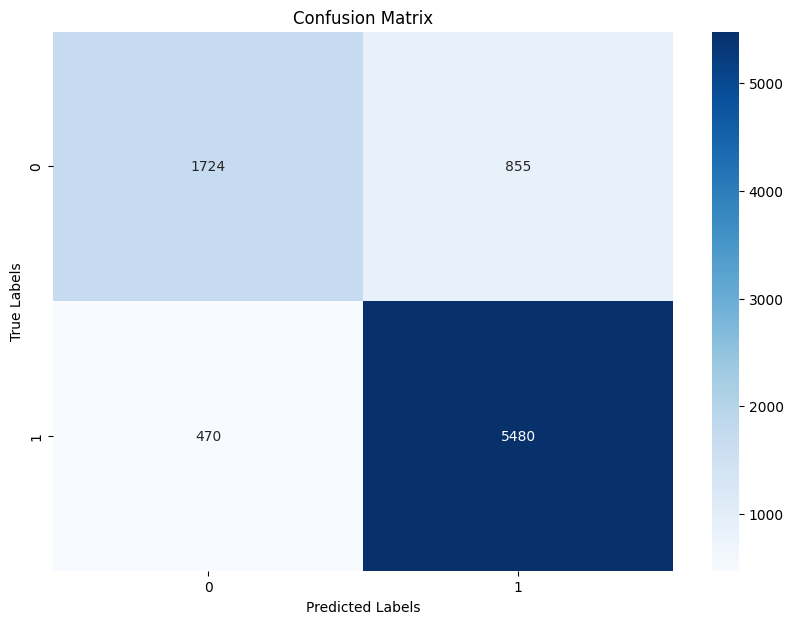

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title for clarity
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()